### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/data_capstone.csv')
df.head()

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,General Offer
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,General Offer
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,General Offer
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,General Offer
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,General Offer


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   plan_type          10000 non-null  object 
 2   device_brand       10000 non-null  object 
 3   avg_data_usage_gb  10000 non-null  float64
 4   pct_video_usage    10000 non-null  float64
 5   avg_call_duration  10000 non-null  float64
 6   sms_freq           10000 non-null  int64  
 7   monthly_spend      10000 non-null  float64
 8   topup_freq         10000 non-null  int64  
 9   travel_score       10000 non-null  float64
 10  complaint_count    10000 non-null  int64  
 11  target_offer       10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


---
## **PREPROCESSING DATA**
**Tahapan:**
1. Explorasi Awal (Understanding Data)
2. Handling Missing Values
3. Handling Duplicates
4. Handling Outliers (Hapus Nilai Negatif + IQR)
5. Encoding Categorical Variables
6. Feature Scaling
7. Train-Test Split
7.5. Handle Imbalanced Data (SMOTE) 
8. Save Processed Data

### **Explorasi Awal Data**

In [4]:
print("STATISTIK DESKRIPTIF")
df.describe()

STATISTIK DESKRIPTIF


,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.958883,0.402639,9.971357,15.010800,109776.500000,2.986600,0.282441,0.492600
std,4.192909,0.195741,4.954993,3.872775,46237.321903,1.709828,0.158366,0.704127
min,0.030000,0.000000,-8.370000,4.000000,-13000.000000,0.000000,0.003376,0.000000
25%,2.870000,0.265290,6.650000,12.000000,78000.000000,2.000000,0.158775,0.000000
50%,4.990000,0.400116,10.020000,15.000000,102000.000000,3.000000,0.261206,0.000000
75%,8.040000,0.535161,13.320000,18.000000,135000.000000,4.000000,0.385656,1.000000
max,39.020000,1.000000,27.770000,31.000000,450000.000000,12.000000,0.854814,5.000000


In [5]:
# check jumlah kolom dan jumlah bais data
df.shape

(10000, 12)

In [6]:
# Cek Tipe Data
print("TIPE DATA SETIAP KOLOM")
print(df.dtypes)
print("\n" + "="*50)
print("DISTRIBUSI KOLOM KATEGORIKAL")
print("="*50)
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

TIPE DATA SETIAP KOLOM
customer_id           object
plan_type             object
device_brand          object
avg_data_usage_gb    float64
pct_video_usage      float64
avg_call_duration    float64
sms_freq               int64
monthly_spend        float64
topup_freq             int64
travel_score         float64
complaint_count        int64
target_offer          object
dtype: object

DISTRIBUSI KOLOM KATEGORIKAL

customer_id:
customer_id
C09984    1
C09983    1
C09982    1
C09981    1
C09980    1
         ..
C00005    1
C00004    1
C00003    1
C00002    1
C00001    1
Name: count, Length: 10000, dtype: int64

plan_type:
plan_type
Prepaid     6108
Postpaid    3892
Name: count, dtype: int64

device_brand:
device_brand
Realme     1509
Xiaomi     1458
Samsung    1439
Huawei     1438
Vivo       1395
Apple      1386
Oppo       1375
Name: count, dtype: int64

target_offer:
target_offer
General Offer             6070
Device Upgrade Offer      1502
Data Booster               797
Retention Offer  

### **Handling Missing Values**

In [7]:
# 2.1 Cek Missing Values
print("CEK MISSING VALUES")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n Tidak ada missing values!")
else:
    print(f"\n Total missing values: {missing_df['Missing Count'].sum()}")

CEK MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

 Tidak ada missing values!


### **Handling Duplicates**

In [8]:
# 3.1 Cek Duplicates
print("CEK DATA DUPLIKAT")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Cek duplikat berdasarkan customer_id
duplicate_ids = df['customer_id'].duplicated().sum()
print(f"Jumlah customer_id duplikat: {duplicate_ids}")

if duplicates == 0:
    print("\n Tidak ada data duplikat!")
else:
    print(f"\n Ditemukan {duplicates} baris duplikat")

CEK DATA DUPLIKAT
Jumlah baris duplikat: 0
Jumlah customer_id duplikat: 0

 Tidak ada data duplikat!


### **Handling Outliers**

In [9]:
# 4.1 Deteksi Outliers dengan IQR
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Hapus kolom yang bukan fitur (seperti customer_id sudah object, jadi aman)
# Tapi hapus kolom target atau ID jika ada dalam numerical

print("="*50)
print("DETEKSI OUTLIERS (IQR METHOD)")
print("="*50)

outlier_info = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = len(outliers)
    
    print(f"\n{col}:")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Jumlah outliers: {len(outliers)}")

print("\n" + "="*50)
print("SUMMARY OUTLIERS")
print("="*50)
for col, count in outlier_info.items():
    if count > 0:
        print(f"{col}: {count} outliers ({count/len(df)*100:.2f}%)")

DETEKSI OUTLIERS (IQR METHOD)

avg_data_usage_gb:
  Lower bound: -4.88
  Upper bound: 15.79
  Jumlah outliers: 305

pct_video_usage:
  Lower bound: -0.14
  Upper bound: 0.94
  Jumlah outliers: 40

avg_call_duration:
  Lower bound: -3.35
  Upper bound: 23.32
  Jumlah outliers: 72

sms_freq:
  Lower bound: 3.00
  Upper bound: 27.00
  Jumlah outliers: 17

monthly_spend:
  Lower bound: -7500.00
  Upper bound: 220500.00
  Jumlah outliers: 250

topup_freq:
  Lower bound: -1.00
  Upper bound: 7.00
  Jumlah outliers: 110

travel_score:
  Lower bound: -0.18
  Upper bound: 0.73
  Jumlah outliers: 70

complaint_count:
  Lower bound: -1.50
  Upper bound: 2.50
  Jumlah outliers: 138

SUMMARY OUTLIERS
avg_data_usage_gb: 305 outliers (3.05%)
pct_video_usage: 40 outliers (0.40%)
avg_call_duration: 72 outliers (0.72%)
sms_freq: 17 outliers (0.17%)
monthly_spend: 250 outliers (2.50%)
topup_freq: 110 outliers (1.10%)
travel_score: 70 outliers (0.70%)
complaint_count: 138 outliers (1.38%)


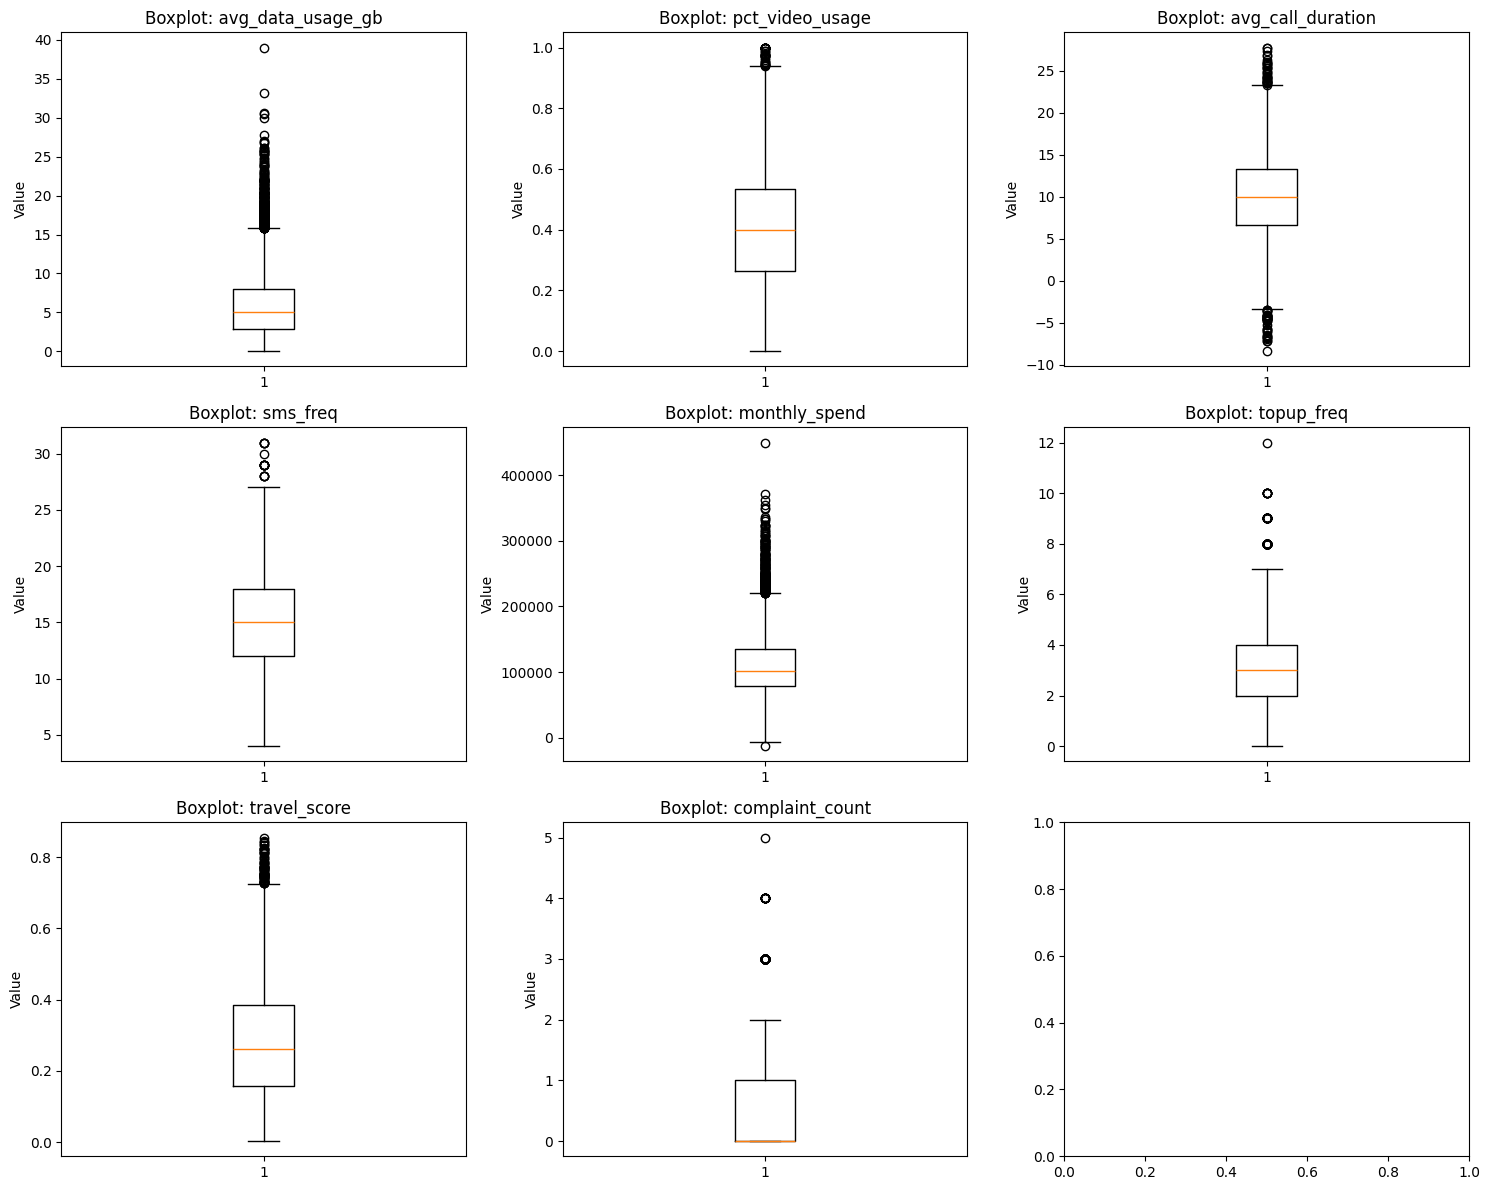

In [10]:
# 4.2 Visualisasi Outliers dengan Boxplot
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Boxplot: {col}')
        axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

### **Handling Outlier: Remove Negative Numeric Values**

In [11]:
# Remove negative numeric values (drop rows where any numeric column < 0)
print("REMOVE NEGATIVE NUMERIC VALUES")
print("="*50)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
neg_counts = (df[num_cols] < 0).sum()
print("Negative value counts per numeric column:")
print(neg_counts[neg_counts > 0])

# Hitung berapa baris yang memiliki nilai negatif di kolom numerik apapun
rows_with_neg = df[(df[num_cols] < 0).any(axis=1)].shape[0]
print(f"\nTotal baris dengan setidaknya satu nilai numeric negatif: {rows_with_neg}")

if rows_with_neg > 0:
    df_before = len(df)
    # Drop rows that have any negative numeric value
    df = df[~(df[num_cols] < 0).any(axis=1)].copy()
    df_after = len(df)
    print(f"Baris sebelum: {df_before}; baris sesudah: {df_after}; terhapus: {df_before - df_after}")
else:
    print("Tidak ditemukan nilai numeric negatif — tidak ada perubahan pada dataframe")


REMOVE NEGATIVE NUMERIC VALUES
Negative value counts per numeric column:
avg_call_duration    229
monthly_spend          2
dtype: int64

Total baris dengan setidaknya satu nilai numeric negatif: 231
Baris sebelum: 10000; baris sesudah: 9769; terhapus: 231


In [12]:
# Drop fitur yang dikecualikan dari modeling
print("DROP EXCLUDED FEATURES")
print("="*50)

excluded_features = ['sms_freq', 'avg_call_duration']
print(f"Fitur yang akan dihapus: {excluded_features}")

df_before_drop = df.shape[1]
df = df.drop(columns=excluded_features, errors='ignore')
df_after_drop = df.shape[1]

print(f"\nJumlah kolom sebelum: {df_before_drop}")
print(f"Jumlah kolom sesudah: {df_after_drop}")
print(f"Kolom terhapus: {df_before_drop - df_after_drop}")
print(f"\nKolom yang tersisa:")
print(df.columns.tolist())
print("\n✓ Excluded features berhasil dihapus")

DROP EXCLUDED FEATURES
Fitur yang akan dihapus: ['sms_freq', 'avg_call_duration']

Jumlah kolom sebelum: 12
Jumlah kolom sesudah: 10
Kolom terhapus: 2

Kolom yang tersisa:
['customer_id', 'plan_type', 'device_brand', 'avg_data_usage_gb', 'pct_video_usage', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count', 'target_offer']

✓ Excluded features berhasil dihapus


### **Drop Excluded Features**
Menghapus fitur yang tidak digunakan: `sms_freq`, `avg_call_duration`

### **STEP 5: Encoding Categorical Variables**
Mengubah variabel kategorikal menjadi numerik

In [13]:
# 5.1 Pisahkan features dan target
print("="*50)
print("ENCODING CATEGORICAL VARIABLES")
print("="*50)

# Simpan customer_id dan target sebelum encoding
customer_ids = df['customer_id'].copy()
target = df['target_offer'].copy()

# Drop kolom yang tidak perlu untuk modeling
df_encoded = df.drop(['customer_id', 'target_offer'], axis=1)

print("Kolom kategorikal yang akan di-encode:")
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    print(f"  - {col}: {df_encoded[col].nunique()} unique values")

ENCODING CATEGORICAL VARIABLES
Kolom kategorikal yang akan di-encode:
  - plan_type: 2 unique values
  - device_brand: 7 unique values


In [ ]:
# 5.2 Label Encoding untuk target variable
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
target_encoded = le_target.fit_transform(target)

print("\nTarget encoding:")
print(f"Classes: {le_target.classes_}")
print(f"Encoded values: {np.unique(target_encoded)}")

# Simpan mapping untuk interpretasi nanti
target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print(f"\nTarget mapping: {target_mapping}")


Target encoding:
Classes: ['Data Booster' 'Device Upgrade Offer' 'Family Plan Offer' 'General Offer'
 'Retention Offer' 'Roaming Pass' 'Streaming Partner Pack' 'Top-up Promo'
 'Voice Bundle']
Encoded values: [0 1 2 3 4 5 6 7 8]

Target mapping: {'Data Booster': np.int64(0), 'Device Upgrade Offer': np.int64(1), 'Family Plan Offer': np.int64(2), 'General Offer': np.int64(3), 'Retention Offer': np.int64(4), 'Roaming Pass': np.int64(5), 'Streaming Partner Pack': np.int64(6), 'Top-up Promo': np.int64(7), 'Voice Bundle': np.int64(8)}


In [15]:
# 5.3 One-Hot Encoding untuk features kategorikal
# Untuk kolom dengan cardinalitas rendah gunakan One-Hot
# Untuk kolom dengan cardinalitas tinggi gunakan Label Encoding atau Target Encoding

df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

print(f"\nShape setelah encoding: {df_encoded.shape}")
print("\n✓ Step 5 selesai - Categorical encoding completed")
print(f"Total features setelah encoding: {df_encoded.shape[1]}")


Shape setelah encoding: (9769, 13)

✓ Step 5 selesai - Categorical encoding completed
Total features setelah encoding: 13


### **STEP 6: Feature Scaling**
Normalisasi/standardisasi fitur numerik

In [16]:
# 6.1 Standardization dengan StandardScaler
from sklearn.preprocessing import StandardScaler

print("="*50)
print("FEATURE SCALING")
print("="*50)

# Initialize scaler
scaler = StandardScaler()

# Fit dan transform pada features
X_scaled = scaler.fit_transform(df_encoded)

# Convert kembali ke DataFrame untuk kemudahan
df_scaled = pd.DataFrame(X_scaled, columns=df_encoded.columns, index=df_encoded.index)

print(f"Shape data setelah scaling: {df_scaled.shape}")
print("\nStatistik setelah scaling (sampel 5 kolom pertama):")
print(df_scaled.iloc[:, :5].describe())
print("\n✓ Step 6 selesai - Feature scaling completed")

FEATURE SCALING
Shape data setelah scaling: (9769, 13)

Statistik setelah scaling (sampel 5 kolom pertama):
       avg_data_usage_gb  pct_video_usage  monthly_spend    topup_freq  \
count       9.769000e+03     9.769000e+03   9.769000e+03  9.769000e+03   
mean        7.200709e-17    -6.982506e-17  -7.018873e-17  1.672892e-17   
std         1.000051e+00     1.000051e+00   1.000051e+00  1.000051e+00   
min        -1.411574e+00    -2.056754e+00  -2.328658e+00 -1.746085e+00   
25%        -7.354749e-01    -6.997001e-01  -6.878312e-01 -5.764008e-01   
50%        -2.307809e-01    -1.426783e-02  -1.696754e-01  8.441267e-03   
75%         4.929312e-01     6.771231e-01   5.427889e-01  5.932834e-01   
max         7.870509e+00     3.046142e+00   7.343584e+00  5.272020e+00   

       travel_score  
count  9.769000e+03  
mean   1.363771e-16  
std    1.000051e+00  
min   -1.761009e+00  
25%   -7.806205e-01  
50%   -1.350837e-01  
75%    6.527102e-01  
max    3.548771e+00  

✓ Step 6 selesai - Feature

### **STEP 7: Train-Test Split**
Membagi data menjadi training dan testing set

In [17]:
# 7.1 Split data
from sklearn.model_selection import train_test_split

print("TRAIN-TEST SPLIT")
print("="*50)

# Split dengan stratified untuk menjaga proporsi target
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, 
    target_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=target_encoded
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nProporsi split:")
print(f"  Training: {len(X_train)/len(df_scaled)*100:.1f}%")
print(f"  Testing: {len(X_test)/len(df_scaled)*100:.1f}%")

# Cek distribusi target di train dan test
print(f"\nDistribusi target di training set:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c} ({c/len(y_train)*100:.1f}%)")

print(f"\nDistribusi target di testing set:")
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c} ({c/len(y_test)*100:.1f}%)")

print("\n✓ Step 7 selesai - Train-test split completed")

TRAIN-TEST SPLIT
X_train shape: (7815, 13)
X_test shape: (1954, 13)
y_train shape: (7815,)
y_test shape: (1954,)

Proporsi split:
  Training: 80.0%
  Testing: 20.0%

Distribusi target di training set:
  Class 0: 626 (8.0%)
  Class 1: 1171 (15.0%)
  Class 2: 62 (0.8%)
  Class 3: 4741 (60.7%)
  Class 4: 594 (7.6%)
  Class 5: 74 (0.9%)
  Class 6: 202 (2.6%)
  Class 7: 290 (3.7%)
  Class 8: 55 (0.7%)

Distribusi target di testing set:
  Class 0: 157 (8.0%)
  Class 1: 293 (15.0%)
  Class 2: 16 (0.8%)
  Class 3: 1185 (60.6%)
  Class 4: 148 (7.6%)
  Class 5: 18 (0.9%)
  Class 6: 51 (2.6%)
  Class 7: 73 (3.7%)
  Class 8: 13 (0.7%)

✓ Step 7 selesai - Train-test split completed


### **STEP 7.5: Handle Imbalanced Data dengan SMOTE** 
**PENTING:** Data memiliki imbalance ratio 89:1 (General Offer vs Voice Bundle)  
SMOTE akan membuat synthetic samples untuk kelas minoritas agar model tidak bias

In [ ]:
# Install imbalanced-learn jika belum ada
# !pip install imbalanced-learn

from sklearn.model_selection import train_test_split

print("="*70)
print("STEP 7.5: APPLYING SMOTE (Handling Imbalanced Data)")
print("="*70)

# Cek distribusi sebelum SMOTE
print("\n DISTRIBUSI SEBELUM SMOTE:")
print("Training set:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    class_name = le_target.classes_[u]
    print(f"  {class_name}: {c:,} ({c/len(y_train)*100:.1f}%)")

print(f"\nTotal training samples: {len(y_train):,}")

# Apply SMOTE
print("\n Applying SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print("\n DISTRIBUSI SETELAH SMOTE:")
print("Training set (balanced):")
unique, counts = np.unique(y_train_balanced, return_counts=True)
for u, c in zip(unique, counts):
    class_name = le_target.classes_[u]
    print(f"  {class_name}: {c:,} ({c/len(y_train_balanced)*100:.1f}%)")

print(f"\nTotal training samples setelah SMOTE: {len(y_train_balanced):,}")
print(f"Penambahan data: {len(y_train_balanced) - len(y_train):,} samples")
print(f"\n NOTE: Test set TIDAK diubah (tetap {len(y_test):,} samples)")
print("\n✓ Step 7.5 selesai - SMOTE applied successfully!")

STEP 7.5: APPLYING SMOTE (Handling Imbalanced Data)

 DISTRIBUSI SEBELUM SMOTE:
Training set:
  Data Booster: 626 (8.0%)
  Device Upgrade Offer: 1,171 (15.0%)
  Family Plan Offer: 62 (0.8%)
  General Offer: 4,741 (60.7%)
  Retention Offer: 594 (7.6%)
  Roaming Pass: 74 (0.9%)
  Streaming Partner Pack: 202 (2.6%)
  Top-up Promo: 290 (3.7%)
  Voice Bundle: 55 (0.7%)

Total training samples: 7,815

 Applying SMOTE...

 DISTRIBUSI SETELAH SMOTE:
Training set (balanced):
  Data Booster: 4,741 (11.1%)
  Device Upgrade Offer: 4,741 (11.1%)
  Family Plan Offer: 4,741 (11.1%)
  General Offer: 4,741 (11.1%)
  Retention Offer: 4,741 (11.1%)
  Roaming Pass: 4,741 (11.1%)
  Streaming Partner Pack: 4,741 (11.1%)
  Top-up Promo: 4,741 (11.1%)
  Voice Bundle: 4,741 (11.1%)

Total training samples setelah SMOTE: 42,669
Penambahan data: 34,854 samples

 NOTE: Test set TIDAK diubah (tetap 1,954 samples)

✓ Step 7.5 selesai - SMOTE applied successfully!


✓ Visualisasi disimpan ke: ../data/plot/smote_comparison.png


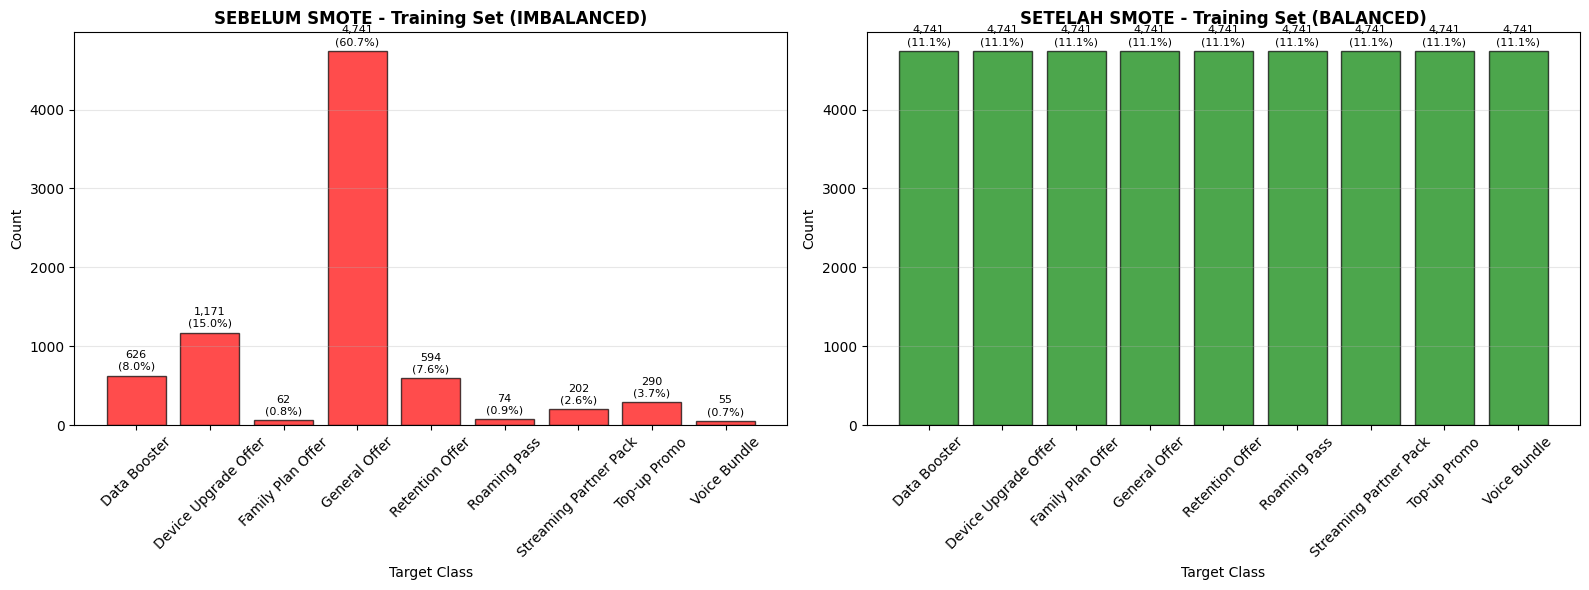

In [19]:
# Visualisasi distribusi sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before SMOTE
unique_before, counts_before = np.unique(y_train, return_counts=True)
class_names = [le_target.classes_[u] for u in unique_before]
axes[0].bar(class_names, counts_before, edgecolor='black', alpha=0.7, color='red')
axes[0].set_title('SEBELUM SMOTE - Training Set (IMBALANCED)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Target Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(counts_before):
    axes[0].text(i, v + 50, f'{v:,}\n({v/len(y_train)*100:.1f}%)', ha='center', va='bottom', fontsize=8)

# After SMOTE
unique_after, counts_after = np.unique(y_train_balanced, return_counts=True)
class_names = [le_target.classes_[u] for u in unique_after]
axes[1].bar(class_names, counts_after, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('SETELAH SMOTE - Training Set (BALANCED)', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Target Class')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(counts_after):
    axes[1].text(i, v + 50, f'{v:,}\n({v/len(y_train_balanced)*100:.1f}%)', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('../data/plot/smote_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Visualisasi disimpan ke: ../data/plot/smote_comparison.png")
plt.show()

### **STEP 8: Save Processed Data**
Menyimpan data yang sudah diproses untuk modeling

In [ ]:
# 8.1 Save processed data
import pickle
import os

print("="*50)
print("SAVING PROCESSED DATA")
print("="*50)

# Create directory jika belum ada
os.makedirs('../data/processed', exist_ok=True)

# Save train-test split (MENGGUNAKAN DATA YANG SUDAH DI-SMOTE)
print("\n Saving balanced training data (after SMOTE)...")
np.save('../data/processed/X_train.npy', X_train_balanced)
np.save('../data/processed/y_train.npy', y_train_balanced)

print(" Saving original test data...")
np.save('../data/processed/X_test.npy', X_test)
np.save('../data/processed/y_test.npy', y_test)

# Save scaler dan encoder untuk production use
with open('../data/processed/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../data/processed/label_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)

# Save feature names
with open('../data/processed/feature_names.pkl', 'wb') as f:
    pickle.dump(df_scaled.columns.tolist(), f)

# Save target mapping
with open('../data/processed/target_mapping.pkl', 'wb') as f:
    pickle.dump(target_mapping, f)

# Save processed dataframe lengkap (optional)
df_final = df_scaled.copy()
df_final['target'] = target_encoded
df_final.to_csv('../data/processed/processed_data.csv', index=False)

print("✓ Data berhasil disimpan ke ../data/processed/")
print("\nFile yang tersimpan:")
print("  - X_train.npy (BALANCED dengan SMOTE), X_test.npy")
print("  - y_train.npy (BALANCED dengan SMOTE), y_test.npy")
print("  - scaler.pkl")
print("  - label_encoder.pkl")
print("  - feature_names.pkl")
print("  - target_mapping.pkl")
print("  - processed_data.csv")
print(f"\n Training set size: {len(y_train_balanced):,} (setelah SMOTE)")
print(f" Test set size: {len(y_test):,} (data original)")

SAVING PROCESSED DATA

 Saving balanced training data (after SMOTE)...
 Saving original test data...
✓ Data berhasil disimpan ke ../data/processed/

File yang tersimpan:
  - X_train.npy (BALANCED dengan SMOTE), X_test.npy
  - y_train.npy (BALANCED dengan SMOTE), y_test.npy
  - scaler.pkl
  - label_encoder.pkl
  - feature_names.pkl
  - target_mapping.pkl
  - processed_data.csv

 Training set size: 42,669 (setelah SMOTE)
 Test set size: 1,954 (data original)


---
## **Ringkasan hasil preprocessing**


In [21]:
# Summary Preprocessing
print("="*70)
print("PREPROCESSING PIPELINE COMPLETED!")
print("="*70)

print("\n DATA SUMMARY:")
print(f"  • Original data shape: {df.shape}")
print(f"  • Processed data shape: {df_scaled.shape}")
print(f"  • Training samples (original): {len(X_train)}")
print(f"  • Training samples (after SMOTE): {len(X_train_balanced)} ⭐")
print(f"  • Testing samples: {len(X_test)}")
print(f"  • Number of features: {df_scaled.shape[1]}")
print(f"  • Number of classes: {len(np.unique(target_encoded))}")

print("\n BALANCING SUMMARY:")
print(f"  • Original imbalance ratio: 89.26:1 (SANGAT IMBALANCED)")
print(f"  • After SMOTE: 1:1 (BALANCED) ✓")
print(f"  • Synthetic samples created: {len(y_train_balanced) - len(y_train):,}")



PREPROCESSING PIPELINE COMPLETED!

 DATA SUMMARY:
  • Original data shape: (9769, 10)
  • Processed data shape: (9769, 13)
  • Training samples (original): 7815
  • Training samples (after SMOTE): 42669 ⭐
  • Testing samples: 1954
  • Number of features: 13
  • Number of classes: 9

 BALANCING SUMMARY:
  • Original imbalance ratio: 89.26:1 (SANGAT IMBALANCED)
  • After SMOTE: 1:1 (BALANCED) ✓
  • Synthetic samples created: 34,854

PREPROCESSING PIPELINE COMPLETED!

 DATA SUMMARY:
  • Original data shape: (9769, 10)
  • Processed data shape: (9769, 13)
  • Training samples (original): 7815
  • Training samples (after SMOTE): 42669 ⭐
  • Testing samples: 1954
  • Number of features: 13
  • Number of classes: 9

 BALANCING SUMMARY:
  • Original imbalance ratio: 89.26:1 (SANGAT IMBALANCED)
  • After SMOTE: 1:1 (BALANCED) ✓
  • Synthetic samples created: 34,854


In [22]:
dftest = pd.read_csv('../data/processed/processed_data.csv')
dftest.head()

,avg_data_usage_gb,pct_video_usage,monthly_spend,topup_freq,travel_score,complaint_count,plan_type_Prepaid,device_brand_Huawei,device_brand_Oppo,device_brand_Realme,device_brand_Samsung,device_brand_Vivo,device_brand_Xiaomi,target
0,-1.061621,2.046720,-0.860550,0.593283,0.013842,-0.699682,0.796856,-0.409856,-0.399751,2.376994,-0.408663,-0.402674,-0.414445,3
1,-1.159227,-1.507241,-1.011679,0.008441,-1.055531,-0.699682,-1.254932,-0.409856,-0.399751,-0.420699,-0.408663,2.483401,-0.414445,3
2,-0.647391,-0.454985,-0.450343,2.347810,0.762691,-0.699682,-1.254932,-0.409856,-0.399751,-0.420699,-0.408663,-0.402674,2.412867,3
3,-0.152220,0.087267,-0.925319,0.593283,0.125934,-0.699682,0.796856,-0.409856,-0.399751,-0.420699,-0.408663,-0.402674,-0.414445,3
4,-0.964016,-0.772672,-0.817370,1.178125,1.298936,-0.699682,0.796856,2.439882,-0.399751,-0.420699,-0.408663,-0.402674,-0.414445,3
